Метод опорных векторов (Support Vector Machine, SVM) — один из видов линейных классификаторов. Функционал, который он оптимизирует, направлен на максимизацию ширины разделяющей полосы между классами. Из теории статистического обучения известно, что эта ширина тесно связана с обобщающей способностью алгоритма, а ее максимизация позволяет бороться с переобучением.

Метод опорных векторов имеет еще одну особенность. Если преобразовать его оптимизационную задачу, то окажется, что итоговый классификатор можно представить как взвешенную сумму скалярных произведений данного объекта на объекты обучающей выборки:


По сути, алгоритм делает предсказания на основе сходства нового объекта с объектами обучающей выборки. При этом, как правило, далеко не все коэффициенты оказываются ненулевыми. Это означает, что классификация делается на основе сходства лишь с частью обучающих объектов. Такие объекты называются опорными.

Реализация в Scikit-Learn
Метод опорных векторов реализован в классе sklearn.svm.SVC.

Основными параметрами этого класса являются коэффициент С и тип ядра kernel. В данной задаче мы будем использовать линейное ядро — для этого нужно задать значение параметра kernel='linear'

Индексы опорных объектов обученного классификатора хранятся в поле support_

**1. Загрузите выборку из файла svm-data.csv. В нем записана двумерная выборка (целевая переменная указана в первом столбце, признаки — во втором и третьем).**

In [9]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


def newline(p1, p2, color=None): # функция отрисовки линии
    #function kredits to: https://fooobar.com/questions/626491/how-to-draw-a-line-with-matplotlib
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], color=color)
    ax.add_line(l)
    return l

In [2]:
data = pd.read_csv('../SVM/svm-data.csv', names=['target', 'feature1', 'feature2'])
y = data['target']
X = data.iloc[:,1:]

**2. Обучите классификатор с линейным ядром, параметром C = 100000 и random_state=241. Такое значение параметра нужно использовать, чтобы убедиться, что SVM работает с выборкой как с линейно разделимой. При более низких значениях параметра алгоритм будет настраиваться с учетом слагаемого в функционале, штрафующего за маленькие отступы, из-за чего результат может не совпасть с решением классической задачи SVM для линейно разделимой выборки.**

In [3]:
svc_classifier = SVC(C=100000, random_state=241, kernel='linear')
svc_classifier.fit(X=X, y=y)

SVC(C=100000, kernel='linear', random_state=241)

**3. Найдите номера объектов, которые являются опорными (нумерация с единицы). Они будут являться ответом на задание. Обратите внимание, что в качестве ответа нужно привести номера объектов в возрастающем порядке через запятую или пробел. Нумерация начинается с 1.**

In [4]:
ans = svc_classifier.support_
ans += 1
ans

array([ 4,  5, 10])

In [5]:
svc_classifier.coef_

array([[-10.4526212 ,  18.02446131]])

C:\Users\Stanislav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


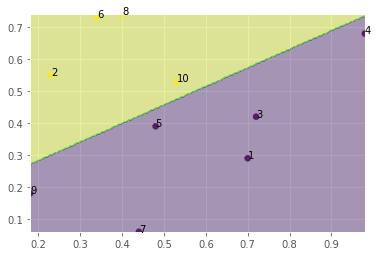

In [25]:
plt.style.use('ggplot')
def draw_2D_svm(clf, x, y, target, labels=False):
    xx, yy = np.meshgrid(np.linspace(x.min(), x.max(), 200),
                         np.linspace(y.min(), y.max(), 200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(x, y, c=target, alpha=0.8)
    if labels:
        for i in data.index:
            plt.annotate(i + 1, (x[i], y[i]))
    plt.show()

draw_2D_svm(svc_classifier, X['feature1'], X['feature2'], y, labels=True)